In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))],
    axis = 1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))],
    axis = 1
)

In [6]:
from tensorflow import keras 
from tensorflow.keras import layers
  
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model
  
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
  
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-05-01 21:39:59.395441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-01 21:39:59.395588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-05-01 21:39:59.596177: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-05-01 21:39:59.738851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 0.6104 - accuracy: 0.8159

2022-05-01 21:40:02.271105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 0.6104 - accuracy: 0.8159 - val_loss: 0.2960 - val_accuracy: 0.9067
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2478 - accuracy: 0.9229 - val_loss: 0.1892 - val_accuracy: 0.9411
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1636 - accuracy: 0.9488 - val_loss: 0.1383 - val_accuracy: 0.9591
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1154 - accuracy: 0.9639 - val_loss: 0.1203 - val_accuracy: 0.9647
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0846 - accuracy: 0.9730 - val_loss: 0.1726 - val_accuracy: 0.9502
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0621 - accuracy: 0.9800 - val_loss: 0.1305 - val_accuracy: 0.9622
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0452 - accuracy: 0.9855 - val_loss: 0.1322 - val_accuracy: 0.9668
Epoch 8/10
375/37

2022-05-01 21:40:22.265879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


368/375 [============================>.] - ETA: 0s - loss: 0.2904 - accuracy: 0.9148

2022-05-01 21:40:24.324069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 6ms/step - loss: 0.2879 - accuracy: 0.9156 - val_loss: 0.1420 - val_accuracy: 0.9605
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1179 - accuracy: 0.9651 - val_loss: 0.1016 - val_accuracy: 0.9697
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0775 - accuracy: 0.9764 - val_loss: 0.0889 - val_accuracy: 0.9717
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0566 - accuracy: 0.9831 - val_loss: 0.0862 - val_accuracy: 0.9755
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0417 - accuracy: 0.9879 - val_loss: 0.0764 - val_accuracy: 0.9778
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0307 - accuracy: 0.9911 - val_loss: 0.0804 - val_accuracy: 0.9766
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0242 - accuracy: 0.9928 - val_loss: 0.0826 - val_accuracy: 0.9783
Epoch 8/10
375/37

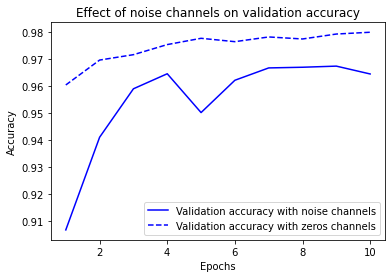

In [7]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [9]:
# Shuffling labels
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_images,
    random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/100
 22/375 [>.............................] - ETA: 1s - loss: 2.3859 - accuracy: 0.0888

2022-05-01 21:46:32.045655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


369/375 [============================>.] - ETA: 0s - loss: 2.3173 - accuracy: 0.1027

2022-05-01 21:46:34.055479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 6ms/step - loss: 2.3171 - accuracy: 0.1030 - val_loss: 2.3088 - val_accuracy: 0.1032
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 2.3002 - accuracy: 0.1160 - val_loss: 2.3141 - val_accuracy: 0.1023
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2910 - accuracy: 0.1249 - val_loss: 2.3179 - val_accuracy: 0.1077
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2775 - accuracy: 0.1393 - val_loss: 2.3267 - val_accuracy: 0.0969
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2610 - accuracy: 0.1547 - val_loss: 2.3421 - val_accuracy: 0.1020
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2410 - accuracy: 0.1655 - val_loss: 2.3477 - val_accuracy: 0.1001
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2180 - accuracy: 0.1803 - val_loss: 2.3661 - val_accuracy: 0.0992
Epoch 8/100

In [12]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words = 10000)

def vectorize_sequences(sequences, dimensions= 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_original = model.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512,
    validation_split = 0.4
)

Epoch 1/20


2022-05-02 08:07:38.541839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 32ms/step - loss: 0.5228 - accuracy: 0.7823 - val_loss: 0.3852 - val_accuracy: 0.8736
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3596 - accuracy: 0.8945

2022-05-02 08:07:40.237904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 12ms/step - loss: 0.3103 - accuracy: 0.9025 - val_loss: 0.3206 - val_accuracy: 0.8768
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2275 - accuracy: 0.9268 - val_loss: 0.2767 - val_accuracy: 0.8938
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1769 - accuracy: 0.9427 - val_loss: 0.2721 - val_accuracy: 0.8951
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1473 - accuracy: 0.9529 - val_loss: 0.2778 - val_accuracy: 0.8911
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1194 - accuracy: 0.9635 - val_loss: 0.2932 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0996 - accuracy: 0.9702 - val_loss: 0.3089 - val_accuracy: 0.8849
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0841 - accuracy: 0.9750 - val_loss: 0.3267 - val_accuracy: 0.8821
Epoch 9/20
30/30 [======

In [13]:
small_model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

small_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_smaller_model = small_model.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512,
    validation_split = 0.4
)

Epoch 1/20


2022-05-02 08:09:13.399838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 26ms/step - loss: 0.6159 - accuracy: 0.6937 - val_loss: 0.5597 - val_accuracy: 0.8201
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.5552 - accuracy: 0.8379

2022-05-02 08:09:14.384466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 13ms/step - loss: 0.5234 - accuracy: 0.8112 - val_loss: 0.5133 - val_accuracy: 0.8247
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4763 - accuracy: 0.8627 - val_loss: 0.4923 - val_accuracy: 0.8167
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4442 - accuracy: 0.8903 - val_loss: 0.4713 - val_accuracy: 0.8691
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4184 - accuracy: 0.9148 - val_loss: 0.4692 - val_accuracy: 0.8466
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3979 - accuracy: 0.9287 - val_loss: 0.4522 - val_accuracy: 0.8795
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3801 - accuracy: 0.9410 - val_loss: 0.4727 - val_accuracy: 0.8399
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3637 - accuracy: 0.9504 - val_loss: 0.4561 - val_accuracy: 0.8614
Epoch 9/20
30/30 [======

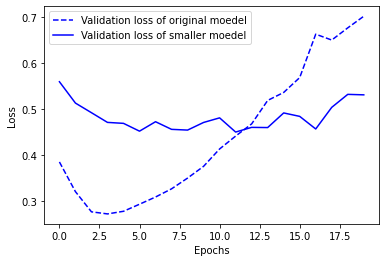

In [23]:
val_loss_original = history_original.history["val_loss"]
val_loss_smaller_model = history_smaller_model.history["val_loss"]
epochs = range(0, 20)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original moedel")
plt.plot(epochs, val_loss_smaller_model, "b",
         label="Validation loss of smaller moedel")
# plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [25]:
l_model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

l_model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_l_model = l_model.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512,
    validation_split = 0.4
)

Epoch 1/20


2022-05-02 08:15:51.367318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 25ms/step - loss: 0.5698 - accuracy: 0.7539 - val_loss: 0.4455 - val_accuracy: 0.7860


2022-05-02 08:15:52.367004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2679 - accuracy: 0.8938 - val_loss: 0.2732 - val_accuracy: 0.8922
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1760 - accuracy: 0.9351 - val_loss: 0.2639 - val_accuracy: 0.8928
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0647 - accuracy: 0.9796 - val_loss: 0.9369 - val_accuracy: 0.7503
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.4787 - val_accuracy: 0.8787
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.7178 - val_accuracy: 0.8653
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 4.0444e-04 - accuracy: 0.9999 - val_loss: 0.7301 - val_accuracy: 0.8865
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 2.7341e-05 - accuracy: 1.0000 - val_loss: 0.8449 - val_accuracy: 0.8867
Epoch

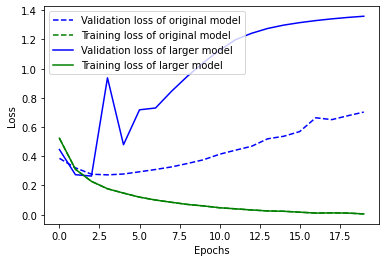

In [29]:
val_loss_original = history_original.history["val_loss"]
train_loss_original = history_original.history["loss"]
val_loss_l_model = history_l_model.history["val_loss"]
train_loss_l_model = history_original.history["loss"]

epochs = range(0, 20)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, train_loss_original, "g--",
         label="Training loss of original model")
plt.plot(epochs, val_loss_l_model, "b",
         label="Validation loss of larger model")
plt.plot(epochs, train_loss_l_model, "g",
         label="Training loss of larger model")

# plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [30]:
model_l2 = keras.Sequential([
    layers.Dense(
        16, 
        kernel_regularizer=keras.regularizers.l2(0.002),
        activation="relu"),
    layers.Dense(16, 
        kernel_regularizer=keras.regularizers.l2(0.002),
        activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_l2.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_l2 = model_l2.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512,
    validation_split = 0.4
)

Epoch 1/20


2022-05-02 08:22:00.969921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


29/30 [============================>.] - ETA: 0s - loss: 0.5926 - accuracy: 0.7758

2022-05-02 08:22:01.889423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 24ms/step - loss: 0.5911 - accuracy: 0.7771 - val_loss: 0.4774 - val_accuracy: 0.8385
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3940 - accuracy: 0.8949 - val_loss: 0.3861 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3259 - accuracy: 0.9182 - val_loss: 0.4171 - val_accuracy: 0.8557
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2997 - accuracy: 0.9247 - val_loss: 0.3568 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2781 - accuracy: 0.9344 - val_loss: 0.3825 - val_accuracy: 0.8757
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2656 - accuracy: 0.9366 - val_loss: 0.3618 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2505 - accuracy: 0.9438 - val_loss: 0.3845 - val_accuracy: 0.8753
Epoch 8/20
30/30 [======

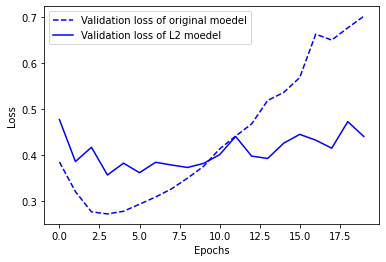

In [31]:
val_loss_original = history_original.history["val_loss"]
val_loss_l2 = history_l2.history["val_loss"]
epochs = range(0, 20)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original moedel")
plt.plot(epochs, val_loss_l2, "b",
         label="Validation loss of L2 moedel")
# plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [32]:
model_l1 = keras.Sequential([
    layers.Dense(
        16, 
        kernel_regularizer=keras.regularizers.l1(0.001),
        activation="relu"),
    layers.Dense(
        16, 
        kernel_regularizer=keras.regularizers.l1(0.001),
        activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_l1.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_model_l1 = model_l1.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512,
    validation_split = 0.4
)

Epoch 1/20


2022-05-02 08:24:05.137550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 1.0739 - accuracy: 0.7347

2022-05-02 08:24:05.902809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 24ms/step - loss: 1.0739 - accuracy: 0.7347 - val_loss: 0.7178 - val_accuracy: 0.8216
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.6681 - accuracy: 0.8349 - val_loss: 0.6423 - val_accuracy: 0.8567
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.6158 - accuracy: 0.8520 - val_loss: 0.6063 - val_accuracy: 0.8562
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5883 - accuracy: 0.8596 - val_loss: 0.5924 - val_accuracy: 0.8597
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5666 - accuracy: 0.8645 - val_loss: 0.6201 - val_accuracy: 0.8359
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5577 - accuracy: 0.8694 - val_loss: 0.5996 - val_accuracy: 0.8451
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5434 - accuracy: 0.8714 - val_loss: 0.5542 - val_accuracy: 0.8668
Epoch 8/20
30/30 [======

In [34]:
model_l1l2 = keras.Sequential([
    layers.Dense(
        16, 
        kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001),
        activation="relu"),
    layers.Dense(
        16, 
        kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001),
        activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_l1l2.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_model_l1l2 = model_l1l2.fit(
    train_data, train_labels,
    epochs = 20, batch_size = 512,
    validation_split = 0.4
)

Epoch 1/20


2022-05-02 08:25:33.235350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


29/30 [============================>.] - ETA: 0s - loss: 1.0942 - accuracy: 0.7277

2022-05-02 08:25:34.146234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 26ms/step - loss: 1.0903 - accuracy: 0.7286 - val_loss: 0.7199 - val_accuracy: 0.8345
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.6822 - accuracy: 0.8342 - val_loss: 0.6717 - val_accuracy: 0.8215
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.6288 - accuracy: 0.8536 - val_loss: 0.6173 - val_accuracy: 0.8589
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5976 - accuracy: 0.8615 - val_loss: 0.6007 - val_accuracy: 0.8605
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5818 - accuracy: 0.8646 - val_loss: 0.6086 - val_accuracy: 0.8444
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5655 - accuracy: 0.8681 - val_loss: 0.5920 - val_accuracy: 0.8533
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5539 - accuracy: 0.8695 - val_loss: 0.5670 - val_accuracy: 0.8637
Epoch 8/20
30/30 [======

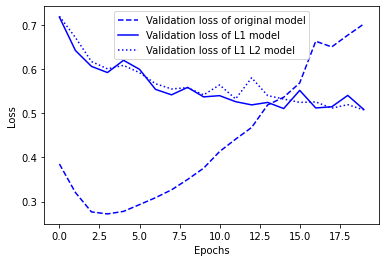

In [35]:
val_loss_original = history_original.history["val_loss"]
val_loss_l1 = history_model_l1.history["val_loss"]
val_loss_l1l2 = history_model_l1l2.history["val_loss"]
epochs = range(0, 20)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_l1, "b",
         label="Validation loss of L1 model")
plt.plot(epochs, val_loss_l1l2, "b:",
         label="Validation loss of L1 L2 model")

# plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [36]:
model_do = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_do.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model_do.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-05-02 08:30:30.497877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 25ms/step - loss: 0.6457 - accuracy: 0.6231 - val_loss: 0.5597 - val_accuracy: 0.8110


2022-05-02 08:30:31.384983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5289 - accuracy: 0.7417 - val_loss: 0.4380 - val_accuracy: 0.8698
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4430 - accuracy: 0.8065 - val_loss: 0.3747 - val_accuracy: 0.8735
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3829 - accuracy: 0.8491 - val_loss: 0.3248 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3340 - accuracy: 0.8881 - val_loss: 0.3029 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2939 - accuracy: 0.9083 - val_loss: 0.3033 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2499 - accuracy: 0.9261 - val_loss: 0.2908 - val_accuracy: 0.8888
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2306 - accuracy: 0.9357 - val_loss: 0.3055 - val_accuracy: 0.8911
Epoch 9/20
30

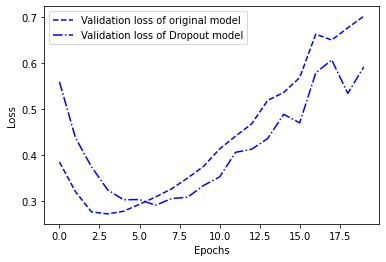

In [38]:
val_loss_original = history_original.history["val_loss"]
val_loss_l1 = history_model_l1.history["val_loss"]
val_loss_l1l2 = history_model_l1l2.history["val_loss"]
val_loss_do = history_dropout.history["val_loss"]
epochs = range(0, 20)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
# plt.plot(epochs, val_loss_l1, "b",
#          label="Validation loss of L1 model")
# plt.plot(epochs, val_loss_l1l2, "b:",
#          label="Validation loss of L1 L2 model")
plt.plot(epochs, val_loss_do, "b-.",
         label="Validation loss of Dropout model")

# plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()